## OpenStreets Exploration
Today I'm going to explore Open Street Map and OSMnx to see if it will be a useful tool for understanding the street and built environment characteristics for our group project. We've selected three locations of traffic fatalities that are in relatively different built environment situations to use to explore, but the idea is that the next step would to be to run this type of analysis/mapping for all traffic fatalities in LA to understand the similarities. 

The three locations:
1. The Valley: Victory Blvd and Van Nuys Blvd (34.18670122912705, -118.44872393539862)
2. Downtown LA: Crocker St and E 4th St (34.04504940058153, -118.24149202214933)
3. South LA: Western and 79th (33.96732894334928, -118.30465163691275)



## 1. Import the Libraries

In [215]:
# download the osm data
import osmnx as ox

# to be able to manipulate data
import pandas as pd

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

import matplotlib.pyplot as plt


## 2. Set the three locations

In [216]:
# configure the locations I want to look at, using the "graph from a point" method. I'm making three center points of the three selected locations, and these match up with Ellie's points so we an look at the maps side my side.
point_1 = (34.18670122912705, -118.44872393539862)
point_2 = (34.04504940058153, -118.24149202214933)
point_3 = (33.96732894334928, -118.30465163691275)

In [217]:
# get the data from OSM that are buildings for 1/8 of a mile distance around each of my selected points
G_1 = ox.geometries_from_point(point_1,tags={'building':True},dist=200)
G_2 = ox.geometries_from_point(point_2,tags={'building':True},dist=200)
G_3 = ox.geometries_from_point(point_3,tags={'building':True},dist=200)

## 3. Initial exploration / get to know the data

In [218]:
#what do these data sets look like?
G_1.shape

(123, 30)

In [219]:
G_2.shape

(107, 33)

In [220]:
G_3.shape

(451, 9)

_Curious that the rows and columns are so different! Let's look at some samples to try to understand why._

In [221]:
#what type is the data? 
type(G_1)

geopandas.geodataframe.GeoDataFrame

In [222]:
type(G_2)

geopandas.geodataframe.GeoDataFrame

In [262]:
#check out a sample of each dataset 
G_1.sample(10)

nodes  \
element_type osmid                                                          
way          430342066  [4296201388, 4296205589, 4296201336, 429620133...   
             316905923  [4313216229, 4313216228, 4313216260, 323099372...   
             430341886  [4296203359, 4296203514, 4296203515, 429620336...   
             319039858  [4313215830, 4313215831, 4313215838, 431321583...   
             321033366  [3277475059, 3277475060, 3277475661, 327747505...   
             319039861  [3254555157, 3254555156, 4313215841, 431321590...   
             316905922  [3230995161, 3230994160, 3230994159, 323099415...   
             319039867  [3254555994, 3254555995, 4298201241, 325455599...   
             432136518  [4313000374, 4313000373, 4313000380, 431300037...   
             319038665  [4313216075, 3254543398, 3254543399, 325454340...   

                       addr:city addr:housenumber addr:postcode addr:street  \
element_type osmid                                                            
way          430342066       NaN              NaN           NaN         NaN   
             316905923       NaN              NaN           NaN         NaN   
             430341886       NaN              NaN           NaN         NaN   
             319039858       NaN              NaN           NaN         NaN   
             321033366       NaN              NaN           NaN         NaN   
             319039861       NaN              NaN           NaN         NaN   
             316905922       NaN              NaN           NaN         NaN   
             319039867       NaN              NaN           NaN         NaN   
             432136518       NaN              NaN           NaN         NaN   
             319038665       NaN              NaN           NaN         NaN   

                       amenity    building    ele height lacounty:ain  ...  \
element_type osmid                                                     ...   
way          430342066     NaN         yes  228.1    9.9   8268014044  ...   
             316905923     NaN      retail  224.9   10.4   2241004005  ...   
             430341886     NaN      retail  222.7    5.1   2237024009  ...   
             319039858     NaN      school  224.9   10.6   2241005024  ...   
             321033366     NaN      retail  222.4    4.5   2237024001  ...   
             319039861     NaN      retail  224.3   10.0   2241005021  ...   
             316905922     NaN      retail  223.2    8.5   2241004001  ...   
             319039867     NaN  commercial  220.2    3.6   2240002007  ...   
             432136518     NaN         yes  225.3    5.1   2236016014  ...   
             319038665     NaN      retail  222.3    8.1   2241005002  ...   

                       addr:unit description phone website parking craft  \
element_type osmid                                                         
way          430342066       NaN         NaN   NaN     NaN     NaN   NaN   
             316905923       NaN         NaN   NaN     NaN     NaN   NaN   
             430341886       NaN         NaN   NaN     NaN     NaN   NaN   
             319039858       NaN         NaN   NaN     NaN     NaN   NaN   
             321033366       NaN         NaN   NaN     NaN     NaN   NaN   
             319039861       NaN         NaN   NaN     NaN     NaN   NaN   
             316905922       NaN         NaN   NaN     NaN     NaN   NaN   
             319039867       NaN         NaN   NaN     NaN     NaN   NaN   
             432136518       NaN         NaN   NaN     NaN     NaN   NaN   
             319038665       NaN         NaN   NaN     NaN     NaN   NaN   

                       addr:housename payment:bitcoin ways type  
element_type osmid                                               
way          430342066            NaN             NaN  NaN  NaN  
             316905923            NaN             NaN  NaN  NaN  
             430341886            NaN             NaN  NaN  NaN  
             3

In [224]:
G_2.sample(10)

geometry  \
element_type osmid                                                          
way          427817588  POLYGON ((-118.24235 34.04482, -118.24253 34.0...   
             427817509  POLYGON ((-118.24200 34.04629, -118.24201 34.0...   
             427817557  POLYGON ((-118.24257 34.04573, -118.24279 34.0...   
             427817682  POLYGON ((-118.24102 34.04495, -118.24099 34.0...   
             427817675  POLYGON ((-118.24021 34.04458, -118.24041 34.0...   
             427817616  POLYGON ((-118.24148 34.04523, -118.24140 34.0...   
             427817598  POLYGON ((-118.24036 34.04391, -118.24047 34.0...   
             427817552  POLYGON ((-118.23885 34.04372, -118.23900 34.0...   
             427817591  POLYGON ((-118.24055 34.04637, -118.24039 34.0...   
             427817624  POLYGON ((-118.24239 34.04592, -118.24219 34.0...   

                                                                    nodes  \
element_type osmid                                                          
way          427817588  [4269941876, 4269941888, 4269941896, 426994188...   
             427817509  [4269942260, 4269942257, 4269942393, 426994239...   
             427817557  [4269942048, 4269942083, 4269942086, 426994208...   
             427817682  [4269941903, 4269941909, 4269941902, 426994185...   
             427817675  [4269941818, 4269941768, 4269941776, 426994181...   
             427817616  [4269941953, 4269941967, 4269941960, 426994194...   
             427817598  [4269941710, 4269941686, 4269941700, 426994171...   
             427817552  [4269941671, 4269941672, 4269941667, 426994166...   
             427817591  [4269942288, 4269942263, 4269942146, 426994218...   
             427817624  [4269942106, 4269942067, 4269942014, 426994204...   

                          building    ele height lacounty:ain lacounty:bld_id  \
element_type osmid                                                              
way          427817588       house   85.8    6.6   5147005171    488228838797   
             427817509  commercial  124.6   44.4   5147006011    488350839461   
             427817557      retail   86.8    7.0   5147006009    488178839179   
             427817682   warehouse   86.0    5.9   5147003036    488666838815   
             427817675  industrial   88.6    8.8   5147002012    488861838656   
             427817616  commercial   86.5    6.7   5147004001    488543838934   
             427817598     factory   85.4    6.0   5147010017    488835838438   
             427817552   warehouse  107.6   28.3   5147001007    489156838439   
             427817591  industrial   96.5   16.4   5147004017    488744839258   
             427817624       hotel   94.2   14.0   5147006006    488289839127   

                       start_date building:units office  ... religion  \
element_type osmid                                       ...            
way          427817588       1922            NaN    NaN  ...      NaN   
             427817509       1988            NaN    yes  ...      NaN   
             427817557       1998            NaN    NaN  ...      NaN   
             427817682       1958            NaN    NaN  ...      NaN   
             427817675       1922            NaN    NaN  ...      NaN   
             427817616       1947            NaN    NaN  ...      NaN   
             427817598       1962            NaN    NaN  ...      NaN   
             427817552       1905            NaN    NaN  ...      NaN   
             427817591       1919            NaN    NaN  ...      NaN   
             427817624       1913            NaN    NaN  ...      NaN   

                       building:use building:levels addr:state tourism  \
element_type osmid                                                       
way          427817588          NaN             NaN        NaN     NaN   
             427817509          NaN             NaN        NaN     NaN   
             427817557          NaN             NaN        NaN     Na

In [225]:
G_3.sample(10)

nodes  \
element_type osmid                                                          
way          412134434  [4136639030, 4136638932, 4136638931, 413663876...   
             411447564  [4131142446, 4131142453, 4131142528, 413114253...   
             412102407  [4136358549, 4136358548, 4136358366, 413635836...   
             411190550  [4129243966, 4129243968, 4129243879, 412924387...   
             412102474  [4136357092, 4136356907, 4136356906, 413635709...   
             412134808  [4136638318, 4136638256, 4136638257, 413663831...   
             412101978  [4136356434, 4136356432, 4136356440, 413635645...   
             412101104  [4136355554, 4136355555, 4136355567, 413635556...   
             411190669  [4129243851, 4129243795, 4129243796, 412924367...   
             411447044  [4131140311, 4131140315, 4131140304, 413114030...   

                           building building:units   ele height lacounty:ain  \
element_type osmid                                                             
way          412134434  residential              2  56.2    4.4   6034002006   
             411447564   apartments              3  54.5    4.9   6034003012   
             412102407        house              1  53.3    2.7   6018030001   
             411190550        house              1  54.0    3.5   6018028023   
             412102474        house              1  55.8    4.4   6018030021   
             412134808  residential              4  56.0    3.4   6034002028   
             412101978        house              1  56.5    4.8   6018030007   
             412101104        house              1  55.0    4.5   6018029023   
             411190669        house              1  53.6    4.0   6018027024   
             411447044        house              1  53.7    4.1   6034006014   

                       lacounty:bld_id start_date  \
element_type osmid                                  
way          412134434    468926810554       1927   
             411447564    469897810535       1930   
             412102407    468784811224       1927   
             411190550    469483810889       1926   
             412102474    468821810995       1929   
             412134808    468839810444       1965   
             412101978    468698810988       1928   
             412101104    469200810899       1927   
             411190669    469841810865       1930   
             411447044    469895810045       1931   

                                                                 geometry  
element_type osmid                                                         
way          412134434  POLYGON ((-118.30574 33.96714, -118.30574 33.9...  
             411447564  POLYGON ((-118.30261 33.96695, -118.30268 33.9...  
             412102407  POLYGON ((-118.30636 33.96897, -118.30630 33.9...  
             411190550  POLYGON ((-118.30408 33.96807, -118.30398 33.9...  
             412102474  POLYGON ((-118.30620 33.96833, -118.30620 33.9...  
             412134808  POLYGON ((-118.30607 33.96684, -118.30607 33.9...  
             412101978  POLYGON ((-118.30664 33.96827, -118.30664 33.9...  
             412101104  POLYGON ((-118.30502 33.96807, -118.30503 33.9...  
             411190669  POLYGON ((-118.30282 33.96800, -118.30282 33.9...  
             411447044  POLYGON ((-118.30272 33.96579, -118.30268 33.9...

_Hm, weird that point 3 has so many fewer columns. Let me look at the columns for each._

In [263]:
#list the columns for G1
list(G_1)

['nodes',
 'addr:city',
 'addr:housenumber',
 'addr:postcode',
 'addr:street',
 'amenity',
 'building',
 'ele',
 'height',
 'lacounty:ain',
 'lacounty:bld_id',
 'name',
 'operator',
 'source',
 'geometry',
 'office',
 'start_date',
 'building:units',
 'building:use',
 'addr:state',
 'addr:unit',
 'description',
 'phone',
 'website',
 'parking',
 'craft',
 'addr:housename',
 'payment:bitcoin',
 'ways',
 'type']

In [264]:
#list the columns for G2
list(G_2)

['geometry',
 'nodes',
 'building',
 'ele',
 'height',
 'lacounty:ain',
 'lacounty:bld_id',
 'start_date',
 'building:units',
 'office',
 'addr:city',
 'addr:housename',
 'addr:housenumber',
 'addr:postcode',
 'addr:street',
 'amenity',
 'name',
 'opening_hours',
 'social_facility',
 'social_facility:for',
 'website',
 'gnis:feature_id',
 'phone',
 'religion',
 'building:use',
 'building:levels',
 'addr:state',
 'tourism',
 'denomination',
 'addr:country',
 'name:signed',
 'ways',
 'type']

In [265]:
#list the columns for G1
list(G_3)

['nodes',
 'building',
 'building:units',
 'ele',
 'height',
 'lacounty:ain',
 'lacounty:bld_id',
 'start_date',
 'geometry']

In [229]:
G_1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 123 entries, ('way', 192856137) to ('relation', 6427443)
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   nodes             123 non-null    object  
 1   addr:city         3 non-null      object  
 2   addr:housenumber  3 non-null      object  
 3   addr:postcode     3 non-null      object  
 4   addr:street       3 non-null      object  
 5   amenity           3 non-null      object  
 6   building          123 non-null    object  
 7   ele               120 non-null    object  
 8   height            120 non-null    object  
 9   lacounty:ain      120 non-null    object  
 10  lacounty:bld_id   120 non-null    object  
 11  name              5 non-null      object  
 12  operator          1 non-null      object  
 13  source            1 non-null      object  
 14  geometry          123 non-null    geometry
 15  office            18 non-null  

In [230]:
G_2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 107 entries, ('way', 423024390) to ('relation', 6363663)
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   geometry             107 non-null    geometry
 1   nodes                107 non-null    object  
 2   building             107 non-null    object  
 3   ele                  107 non-null    object  
 4   height               107 non-null    object  
 5   lacounty:ain         107 non-null    object  
 6   lacounty:bld_id      107 non-null    object  
 7   start_date           98 non-null     object  
 8   building:units       11 non-null     object  
 9   office               6 non-null      object  
 10  addr:city            6 non-null      object  
 11  addr:housename       1 non-null      object  
 12  addr:housenumber     6 non-null      object  
 13  addr:postcode        6 non-null      object  
 14  addr:street          6 non-null

In [231]:
G_3.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 451 entries, ('way', 411190209) to ('way', 412135140)
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   nodes            451 non-null    object  
 1   building         451 non-null    object  
 2   building:units   450 non-null    object  
 3   ele              451 non-null    object  
 4   height           451 non-null    object  
 5   lacounty:ain     451 non-null    object  
 6   lacounty:bld_id  451 non-null    object  
 7   start_date       450 non-null    object  
 8   geometry         451 non-null    geometry
dtypes: geometry(1), object(8)
memory usage: 52.9+ KB


_Curious about the reason there are less columns for G3, which is the South LA point. Wonder if this is a function of openstreets crowd sourcing the data, and less information has been added for different neighborhoods? The main data I'm going to look at is building type, and potentially in the future height and building date, so I should have enough data as is._

## 4. Exploring Building Uses
**Now that I have an overall sense of what characteristics and data points we have for the buildings around our three locations, I'm going to dive into the building type data, as I think that will be relavent to out project.**


## Get to know the data

In [266]:
#look at how many of each type of building are around each location
G1_building_counts = G_1.building.value_counts()
G1_building_counts

retail        69
commercial    37
yes           14
school         2
industrial     1
Name: building, dtype: int64

In [233]:
G2_building_counts = G_2.building.value_counts()
G2_building_counts

retail        25
warehouse     22
commercial    19
industrial    18
factory        9
yes            5
house          4
hotel          3
apartments     2
Name: building, dtype: int64

In [234]:
G3_building_counts = G_3.building.value_counts()
G3_building_counts

house          317
apartments      68
residential     65
yes              1
Name: building, dtype: int64

## Create dataframes from value counts
I'm going to create data frames for the 'building' column for each of the three sites so that I can more easily view this data and use it to plot on a chart.

In [235]:
type(G1_building_counts)

pandas.core.series.Series

In [236]:
# convert G1 into a dataframe
df_G1_building_counts = pd.DataFrame(G1_building_counts)
df_G1_building_counts

,building
retail,69
commercial,37
yes,14
school,2
industrial,1


In [237]:
#reset the G1 index
df_G1_building_counts = df_G1_building_counts.reset_index()
df_G1_building_counts

,index,building
0,retail,69
1,commercial,37
2,yes,14
3,school,2
4,industrial,1


In [238]:
#rename the G1 columns
df_G1_building_counts.columns = ['building_type','count']
df_G1_building_counts

,building_type,count
0,retail,69
1,commercial,37
2,yes,14
3,school,2
4,industrial,1


In [239]:
# convert G2 into a dataframe
df_G2_building_counts = pd.DataFrame(G2_building_counts)
df_G2_building_counts

,building
retail,25
warehouse,22
commercial,19
industrial,18
factory,9
yes,5
house,4
hotel,3
apartments,2


In [240]:
#reset the G2 index
df_G2_building_counts = df_G2_building_counts.reset_index()
df_G2_building_counts

,index,building
0,retail,25
1,warehouse,22
2,commercial,19
3,industrial,18
4,factory,9
5,yes,5
6,house,4
7,hotel,3
8,apartments,2


In [241]:
#rename the G2 columns
df_G2_building_counts.columns = ['building_type','count']
df_G2_building_counts

,building_type,count
0,retail,25
1,warehouse,22
2,commercial,19
3,industrial,18
4,factory,9
5,yes,5
6,house,4
7,hotel,3
8,apartments,2


In [269]:
# convert G3 into a dataframe
df_G3_building_counts = pd.DataFrame(G3_building_counts)
df_G3_building_counts

,building
house,317
apartments,68
residential,65
yes,1


In [270]:
#reset the G3 index
df_G3_building_counts = df_G3_building_counts.reset_index()
df_G3_building_counts

,index,building
0,house,317
1,apartments,68
2,residential,65
3,yes,1


In [271]:
#rename the G3 columns
df_G3_building_counts.columns = ['building_type','count']
df_G3_building_counts

,building_type,count
0,house,317
1,apartments,68
2,residential,65
3,yes,1


## Plotting the data on bar charts

<AxesSubplot:ylabel='building_type'>

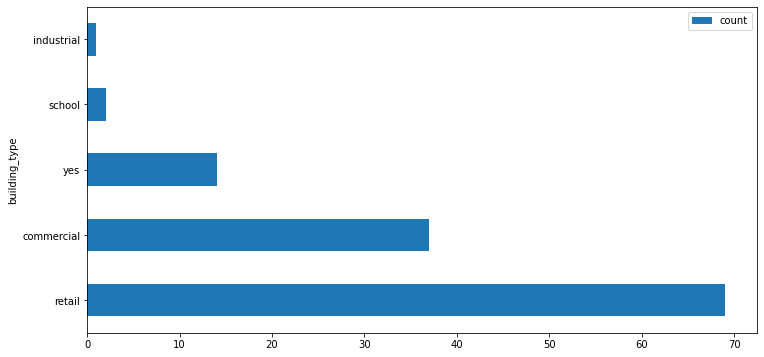

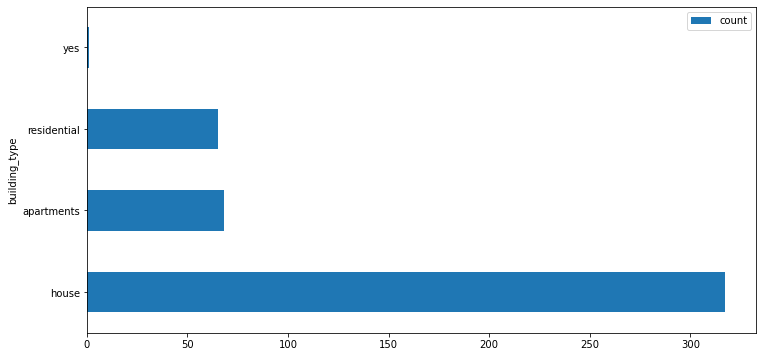

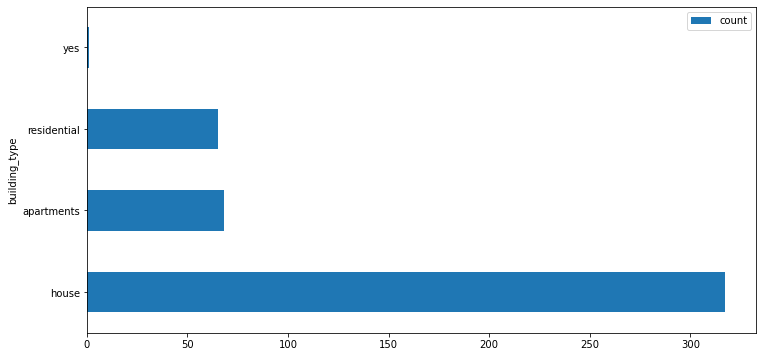

In [276]:
#Plotting one data frame
df_G1_building_counts.plot.barh(figsize=(12,6),
                                x='building_type')
df_G3_building_counts.plot.barh(figsize=(12,6),
                                x='building_type')

#Plotting one data frame
df_G3_building_counts.plot.barh(figsize=(12,6),
                                x='building_type')

_A next step for this section could be to plot all three locations on one bar chart, but it would take a bit more work because I believe I'd have to combine the dataframes into one in order to plot them together? Need to look into this more, but want to get to mapping the building use types._

## Map and visiualize!
Next I'm going to try to map the buildings and their types at each location.

**Plot the buildings on a map individually**

(-118.45103311, -118.44641729, 34.184563095, 34.188771805)

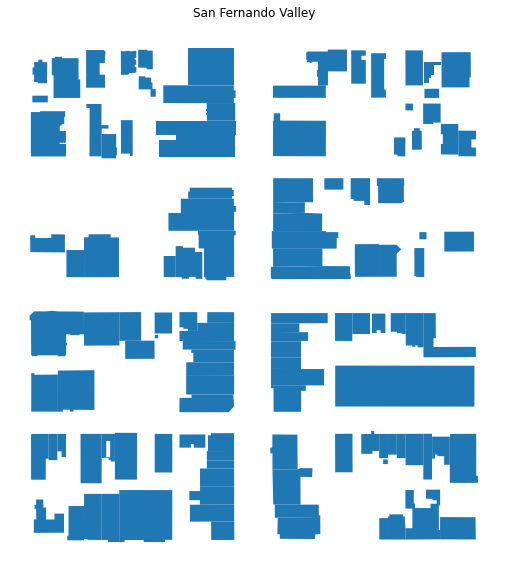

In [278]:
#create a map plot
ax = G_1.plot(figsize=(10,10))
ax.set_title('San Fernando Valley')
ax.axis('off')

(-118.24453725500001, -118.237933845, 34.04162166, 34.04747454)

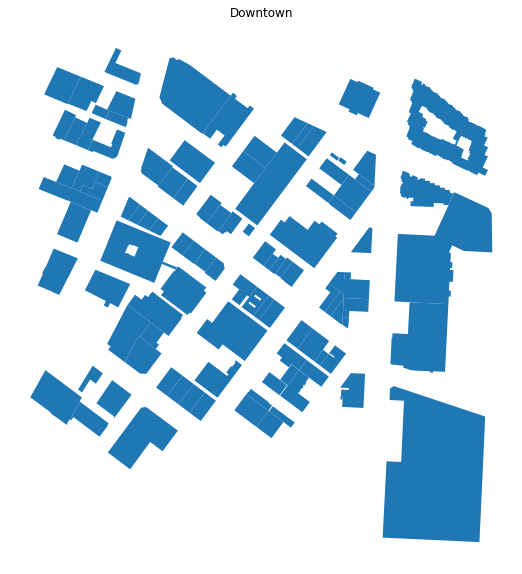

In [279]:
ax = G_2.plot(figsize=(10,10))
ax.set_title('Downtown')
ax.axis('off')

(-118.30693142, -118.30237697999999, 33.965435705, 33.969160195)

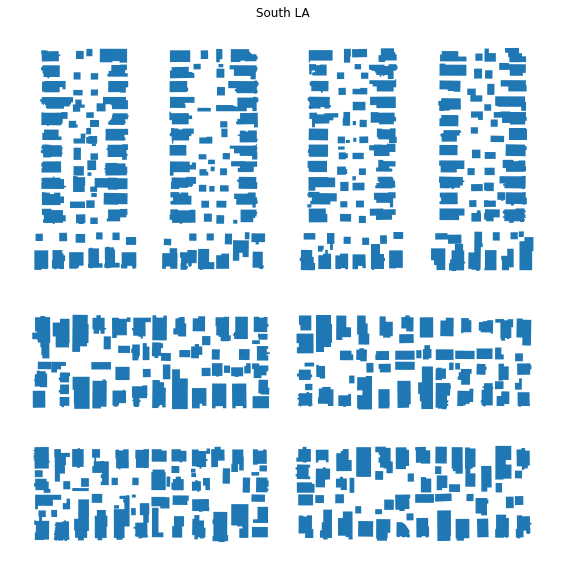

In [280]:
ax = G_3.plot(figsize=(10,10))
ax.set_title('South LA')
ax.axis('off')

_Images like this might be helpful for comparing things like building size, density, and block configuration. But let's trying to color code the uses and look at the three sites comparatively, and see if I can make it a function so I can easily run it for all three sites! It also looks like the scale it a bit different on each, which makes it hard to compare. I wonder why since I said the same distance radius from each point. Maybe when I map it on a basemap I'll be be to understand why better._

**Map the buildings with different colors for each building type**

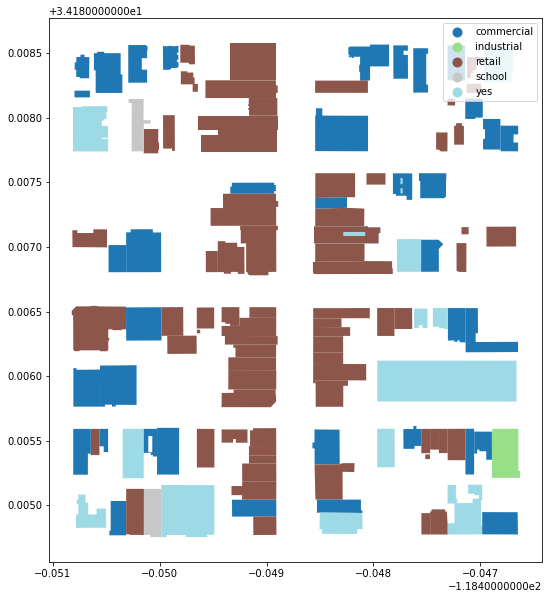

In [250]:
ax = G_1.plot(figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True)

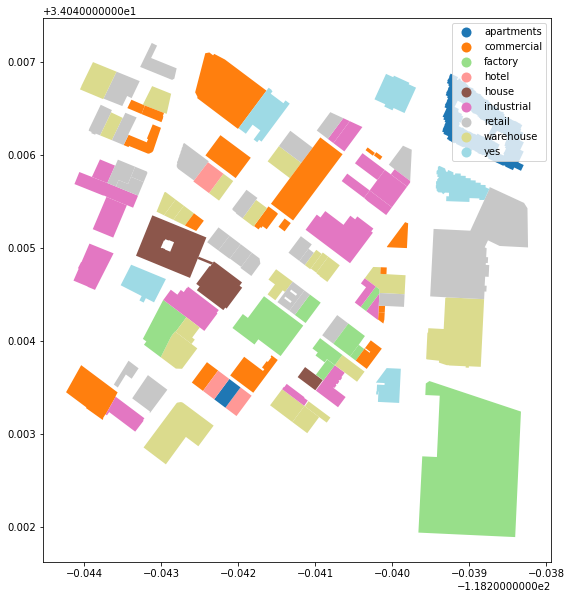

In [251]:
ax = G_2.plot(figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True)

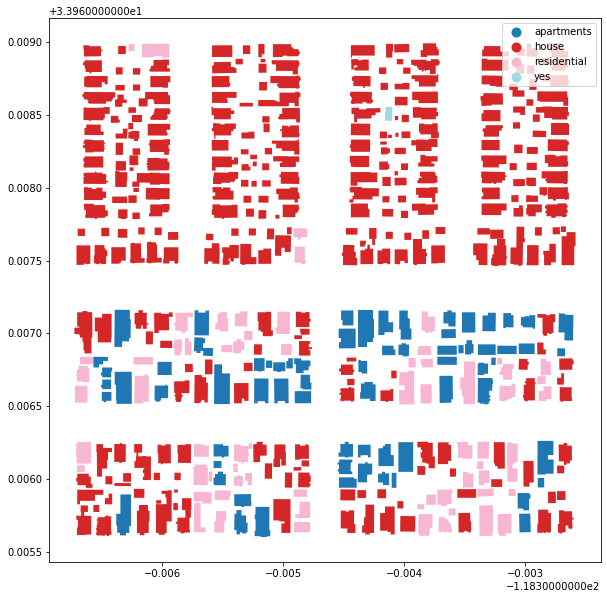

In [252]:
ax = G_3.plot(figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True)

Text(0.5, 1.0, 'South LA')

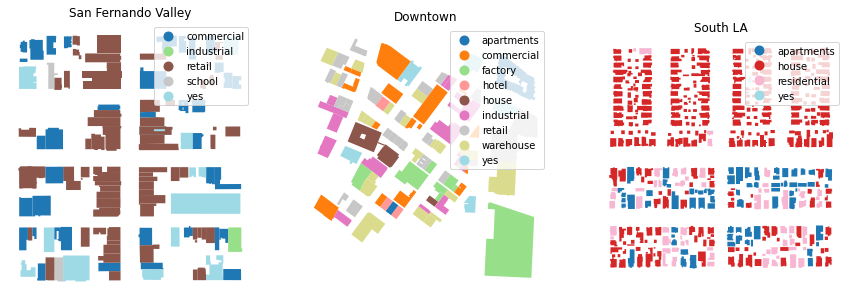

In [283]:
# put the three map together so it's easier to compare

# create the 1x3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 12))

# name each subplot
ax1, ax2, ax3 = axs

#point 1:
G_1.plot(figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True,
        ax=ax1)
ax1.axis("off")
ax1.set_title("San Fernando Valley")

#point 2:
G_2.plot(figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True,
        ax=ax2)
ax2.axis("off")
ax2.set_title("Downtown")

#point3:
G_3.plot(figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True,
        ax=ax3)
ax3.axis("off")
ax3.set_title("South LA")

_But these maps each have different colors for the various building types, so it's not very useful to compare! let's see if we can either make subplots with a shared legend, or manually set the colors?_

**Let's look at the building types for each site**

In [253]:
df_G1_building_counts

,building_type,count
0,retail,69
1,commercial,37
2,yes,14
3,school,2
4,industrial,1


In [254]:
df_G2_building_counts

,building_type,count
0,retail,25
1,warehouse,22
2,commercial,19
3,industrial,18
4,factory,9
5,yes,5
6,house,4
7,hotel,3
8,apartments,2


In [255]:
df_G3_building_counts

,index,building
0,house,317
1,apartments,68
2,residential,65
3,yes,1


In [282]:
## set specific colors for each building type
building_palette = {'apartments': '#005f73',
                    'commercial': '#0a9396',
                    'factory': '#94d2bd',
                    'hotel': '#e9d8a6',
                    'house': '#ee9b00',
                    'industrial': '#ca6702',
                    'retail': '#bb3e03',
                    'residential': '#ae2012', 
                    'school': '#9b2226',
                    'warehouse': '#001219',
                    'yes':'#52b788',
}
building_palette

{'apartments': '#005f73',
 'commercial': '#0a9396',
 'factory': '#94d2bd',
 'hotel': '#e9d8a6',
 'house': '#ee9b00',
 'industrial': '#ca6702',
 'retail': '#bb3e03',
 'residential': '#ae2012',
 'school': '#9b2226',
 'warehouse': '#001219',
 'yes': '#52b788'}

Text(0.5, 1.0, 'South LA')

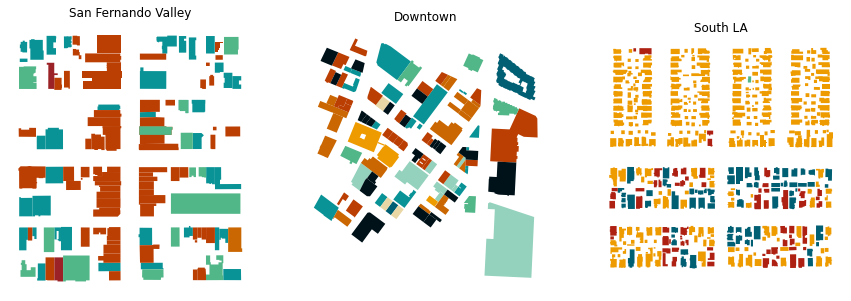

In [258]:
# create the 1x3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 12))

# name each subplot
ax1, ax2, ax3 = axs

#point 1:

# Loop through each attribute type and plot it using the colors assigned in the dictionary
for ctype, data in G_1.groupby('building'):
    
    # Define the color for each group using the dictionary
    color = building_palette[ctype]
    
    # Plot each group using the color defined above
    data.plot(color=color,
              ax=ax1,
              figsize=(10,10),
              legend=True,
             legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)})

ax1.axis("off")
ax1.set_title("San Fernando Valley")

#point 2:
# Loop through each attribute type and plot it using the colors assigned in the dictionary
for ctype, data in G_2.groupby('building'):
    
    # Define the color for each group using the dictionary
    color = building_palette[ctype]
    
    # Plot each group using the color defined above
    data.plot(color=color,
              ax=ax2,
              label=ctype,
              figsize=(10,10),
              legend=True)
ax2.axis("off")
ax2.set_title("Downtown")

#point3:
# Loop through each attribute type and plot it using the colors assigned in the dictionary
for ctype, data in G_3.groupby('building'):
    
    # Define the color for each group using the dictionary
    color = building_palette[ctype]
    
    # Plot each group using the color defined above
    data.plot(color=color,
              ax=ax3,
              label=ctype,
              figsize=(10,10),
              legend=True)
ax3.axis("off")
ax3.set_title("South LA")

_Hm, but now the legends are no longer appearing_

Text(0.5, 1.0, 'Downtown')

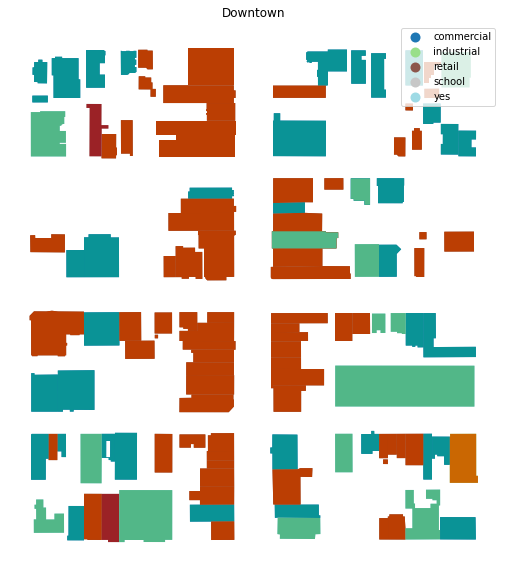

In [284]:
#let's try using the same code to create a map on it's own to see if the disappearing legend is coming from the subplot part?

ax = G_1.plot(figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True)

for ctype, data in G_1.groupby('building'):
    
    # Define the color for each group using the dictionary
    color = building_palette[ctype]
    
    # Plot each group using the color defined above
    data.plot(color=color,
              ax=ax,
              label=ctype,
              figsize=(10,10),
              legend=True)
ax.axis("off")
ax.set_title("Downtown")

_Hmm, now the legend is back!_

_It seems like the Open Streets data will be very helpful for our project! This experiment with three points showed potential for learning about land use characterstics for high fatalitiy corridors, and potentially other characterstics like building height and building density, depending on the availablity of the data once we establish all of our high fatality points or corridors we want to explore. I think our next step for this is to set some parameters for identifying the points or corridors we want to focus on, and then setting up this above analysis as more of a function so it's easy to run for many points_